# MOBILE PRICE SEGMENTATION
Problem Statement:

This project aims to address this issue by developing a machine learning solution for classifying mobile phone prices based on their specifications and features.


# Importing All Essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('/content/train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df[df.duplicated()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [10]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Data Visualization
Boxplot for detecting Outliers

In [11]:
Num_var=[]
for i in df.columns:
 if df[i].dtype=='int' or df[i].dtype=='float':
  Num_var.append(i)

column battery_power


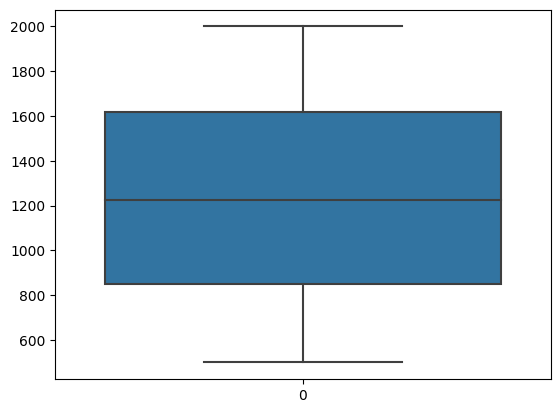


column blue


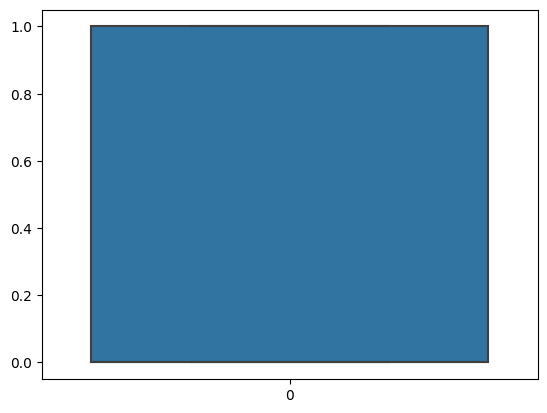


column clock_speed


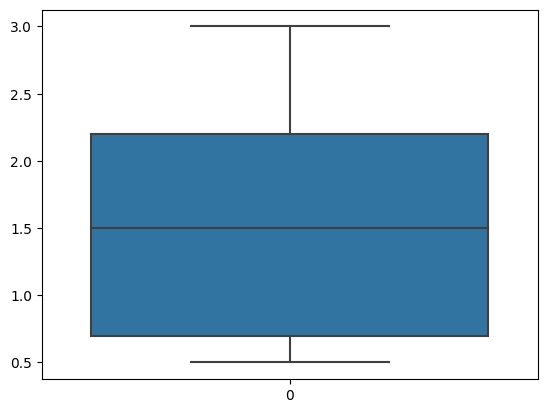


column dual_sim


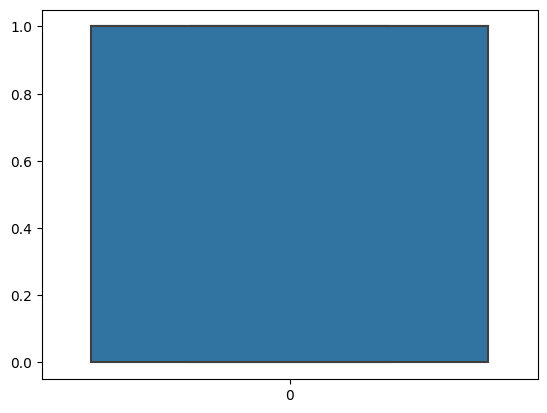


column fc


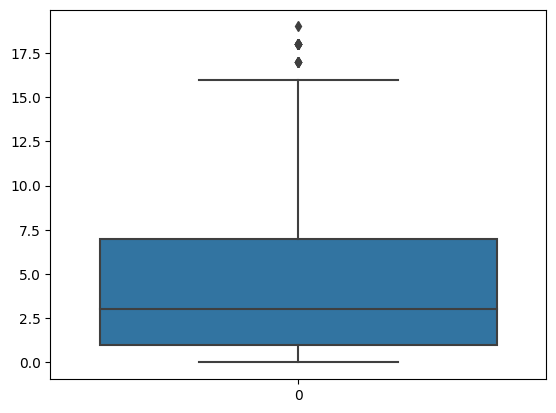


column four_g


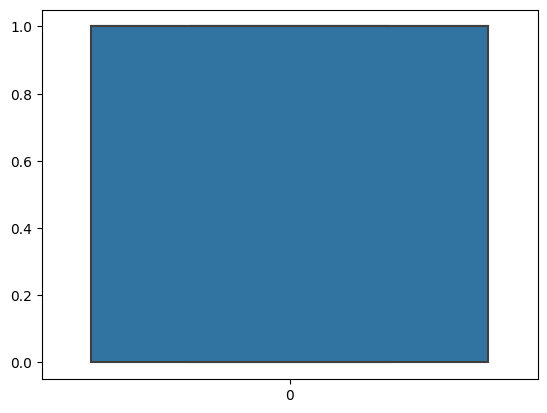


column int_memory


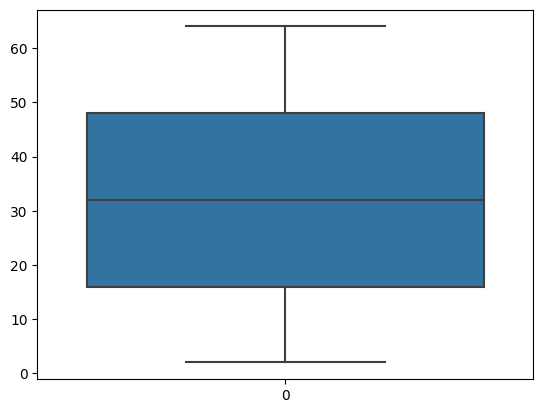


column m_dep


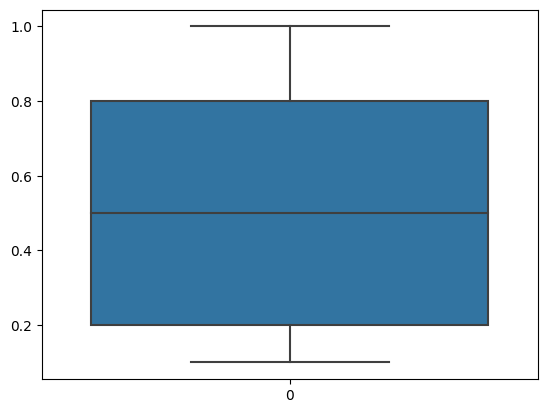


column mobile_wt


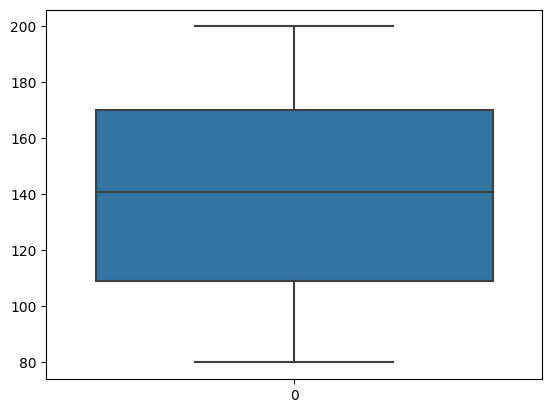


column n_cores


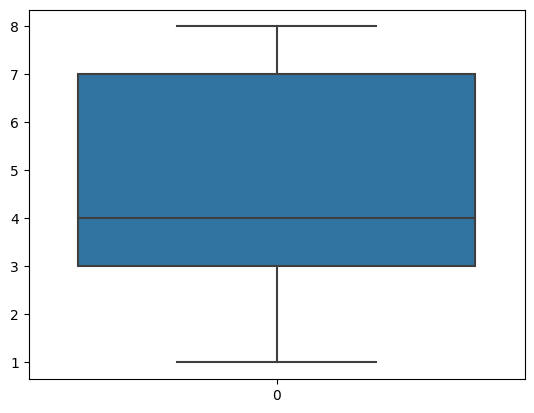


column pc


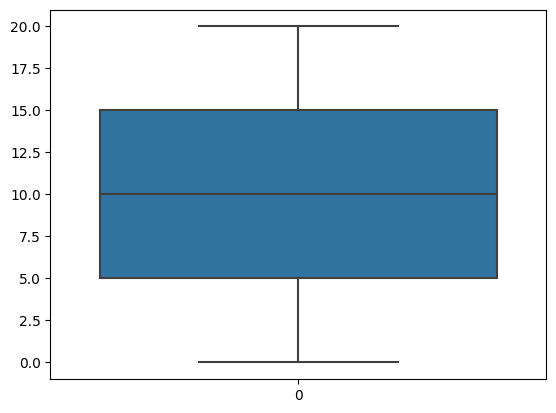


column px_height


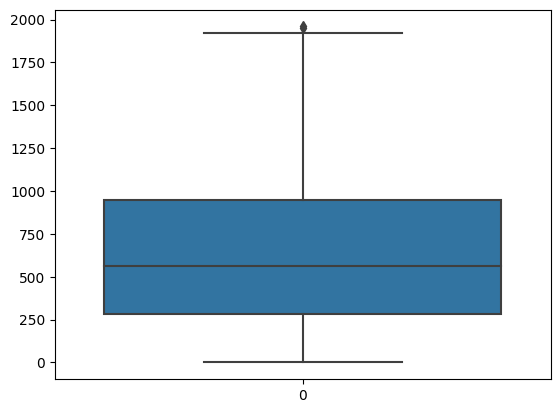


column px_width


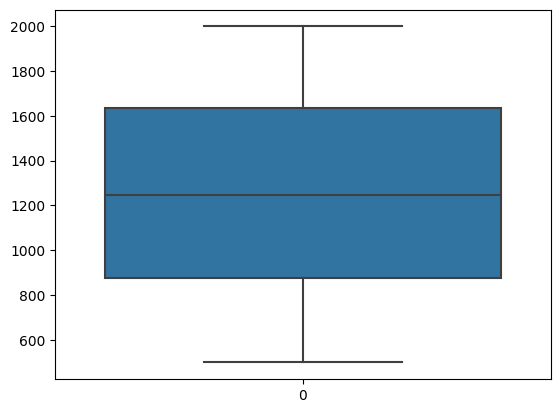


column ram


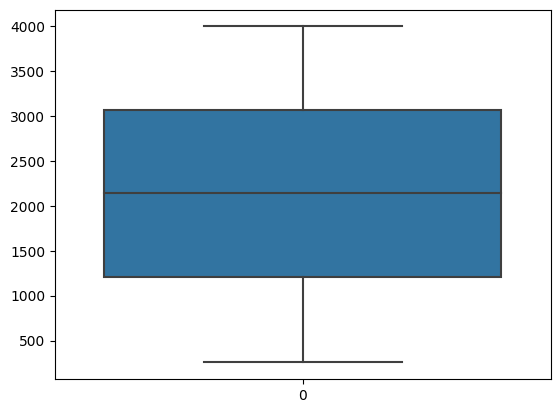


column sc_h


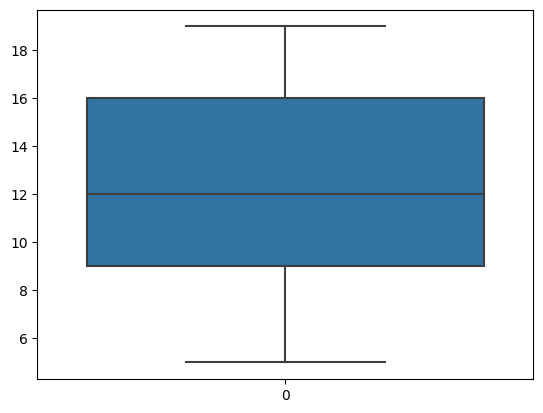


column sc_w


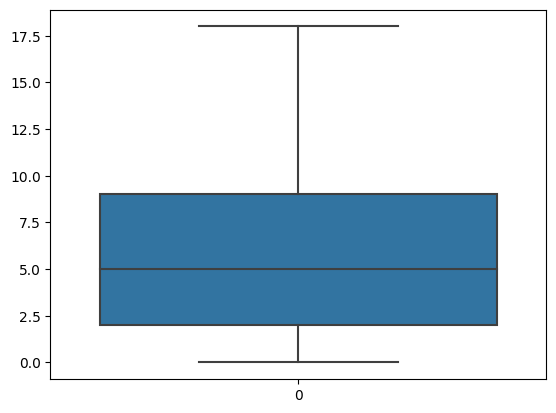


column talk_time


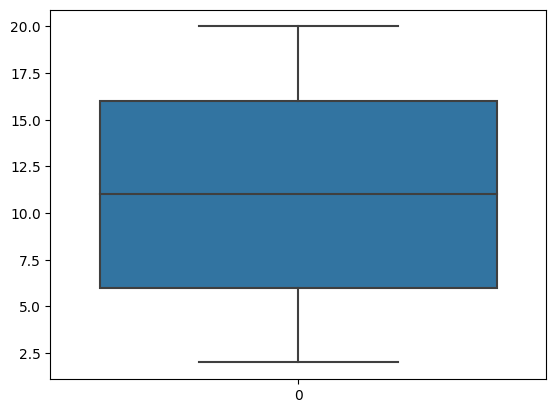


column three_g


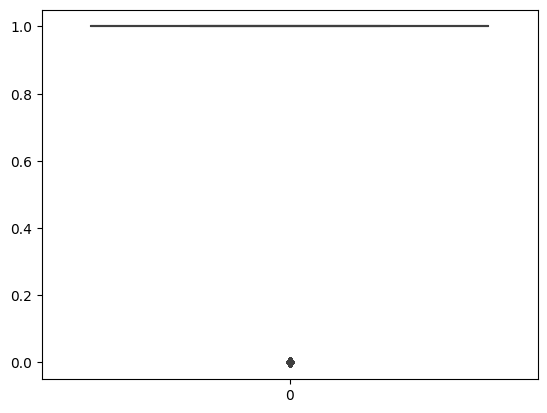


column touch_screen


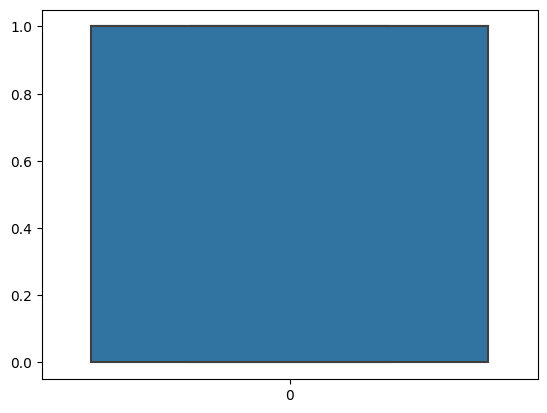


column wifi


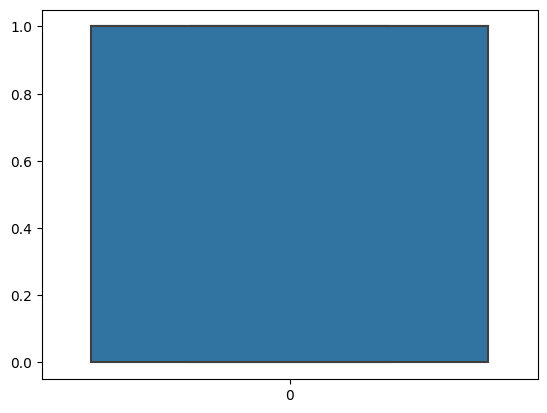


column price_range


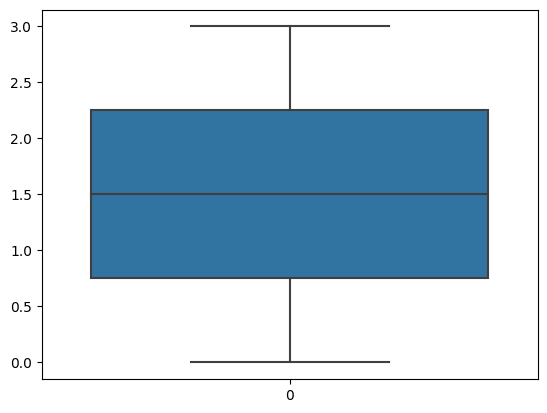

In [12]:
 for j in Num_var:
  print('column',j)
  sb.boxplot(df[j])
  plt.show()
  print('')

# Distribution Plot
To Check the distribution

column battery_power


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


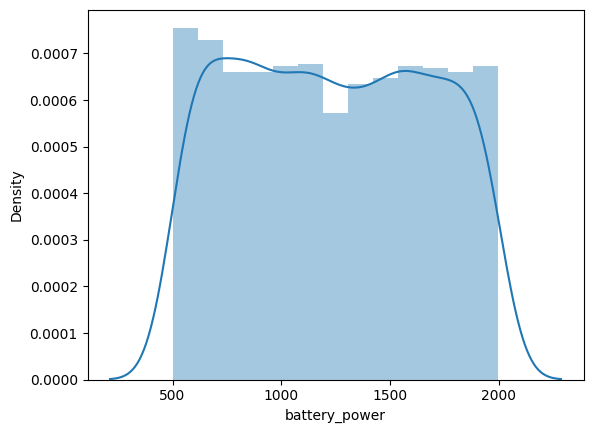


column blue


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


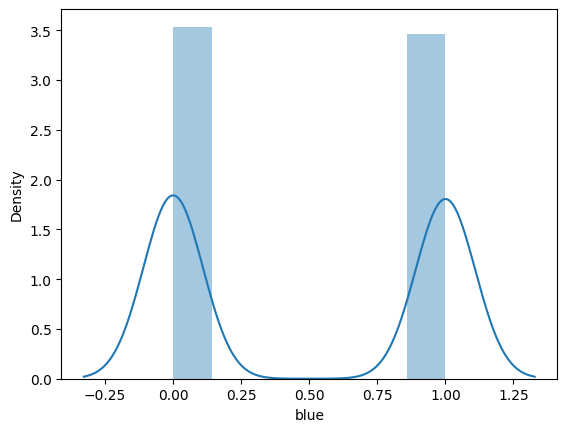


column clock_speed


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


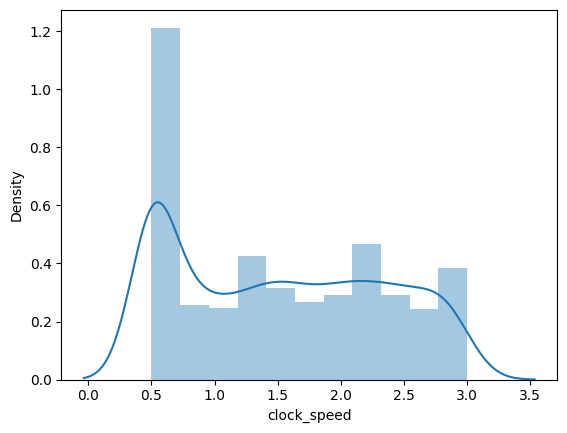


column dual_sim


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


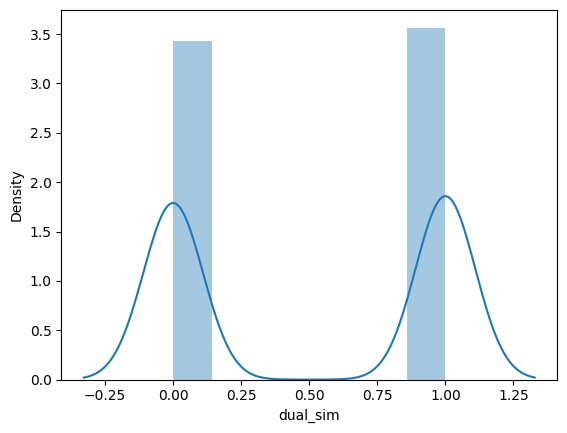


column fc


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


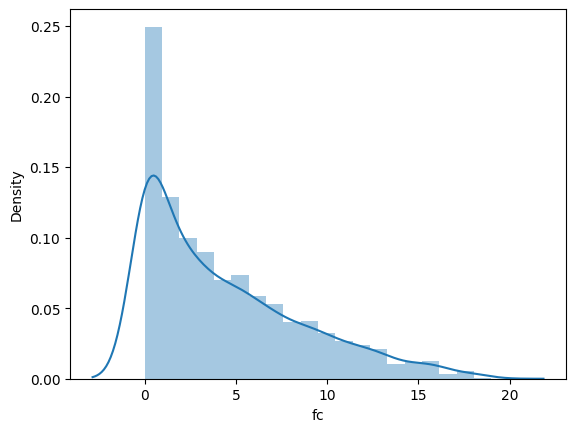


column four_g


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


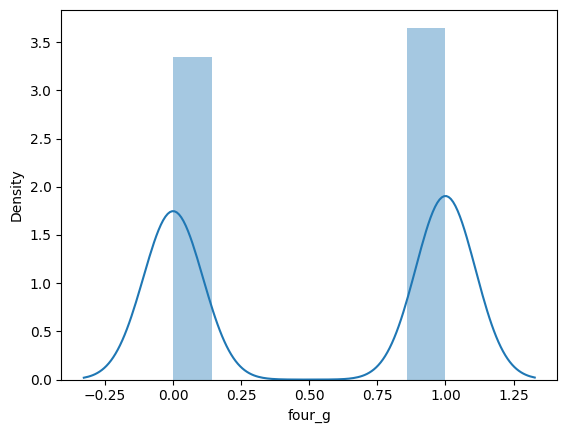


column int_memory


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


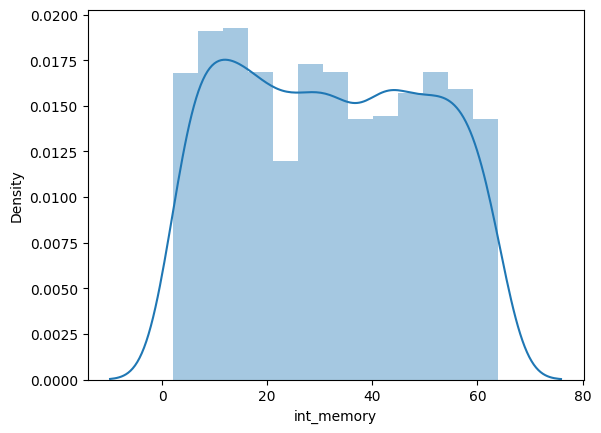


column m_dep


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


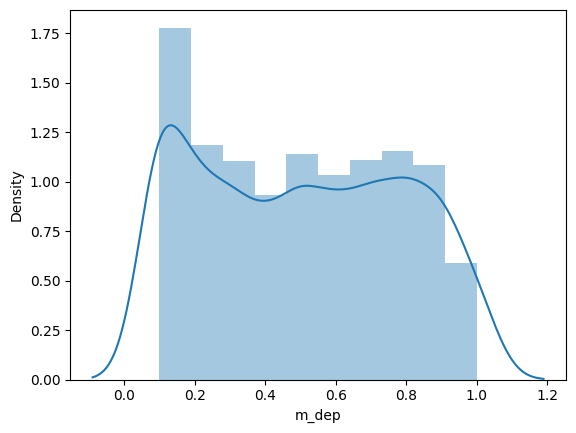


column mobile_wt


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


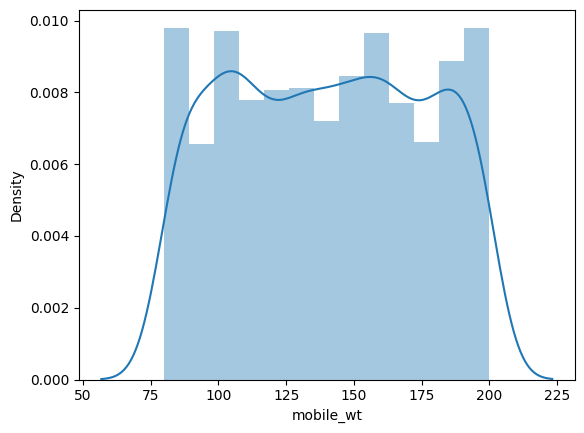


column n_cores


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


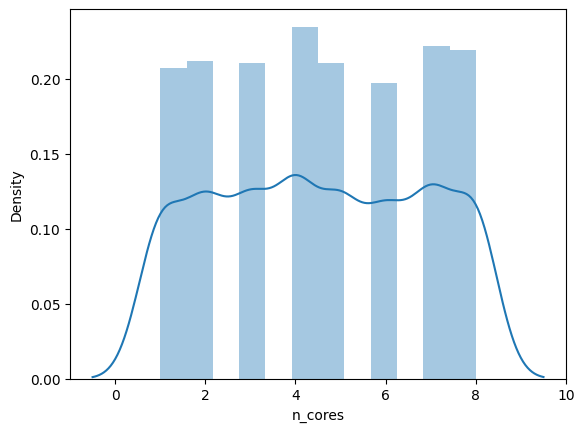


column pc


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


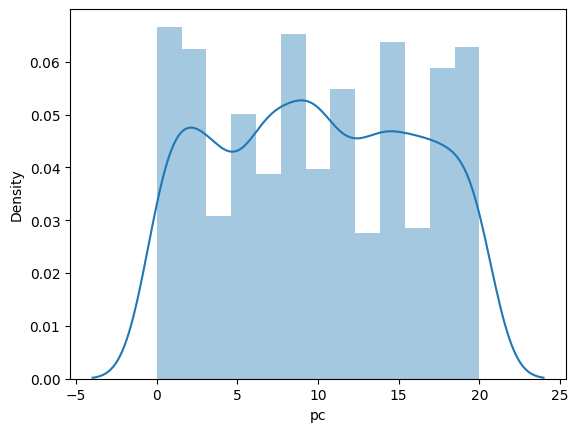


column px_height


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


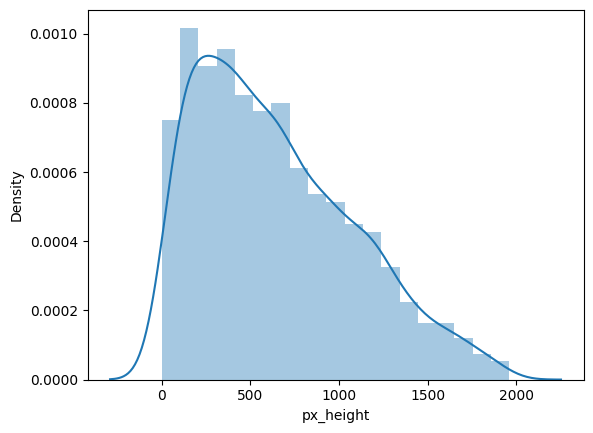


column px_width


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


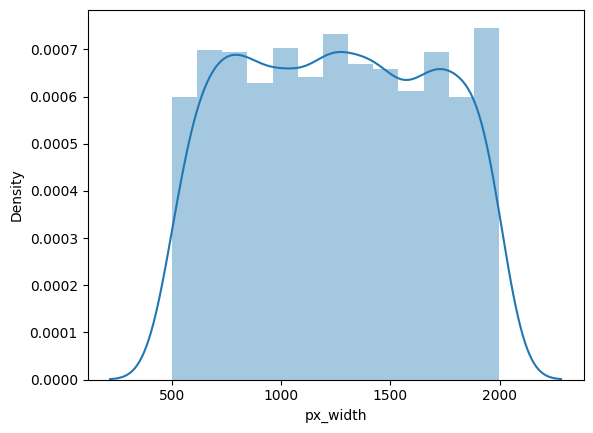


column ram


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


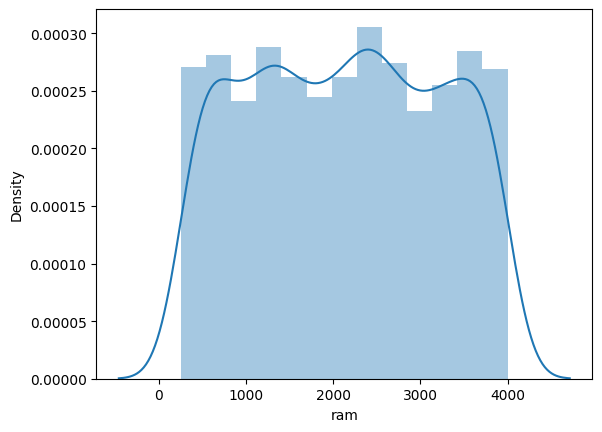


column sc_h


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


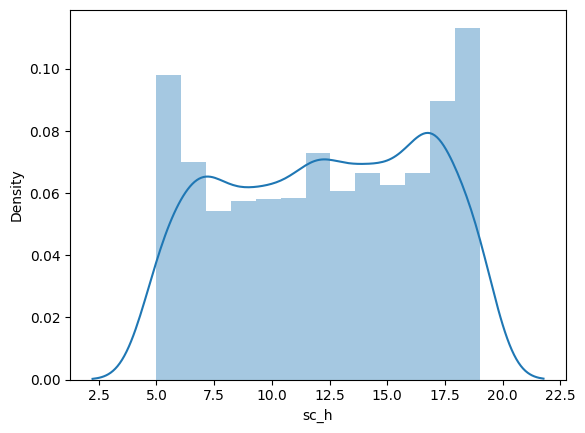


column sc_w


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


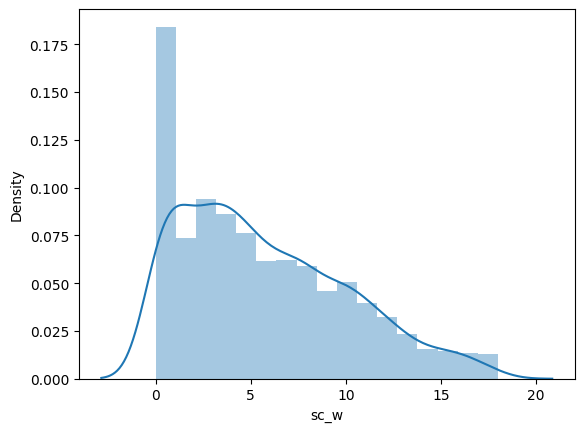


column talk_time


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


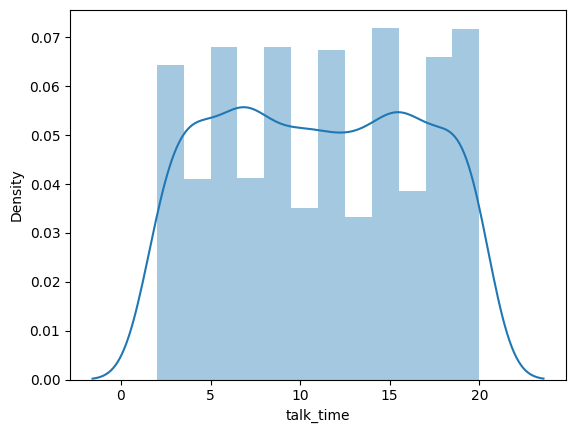


column three_g


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


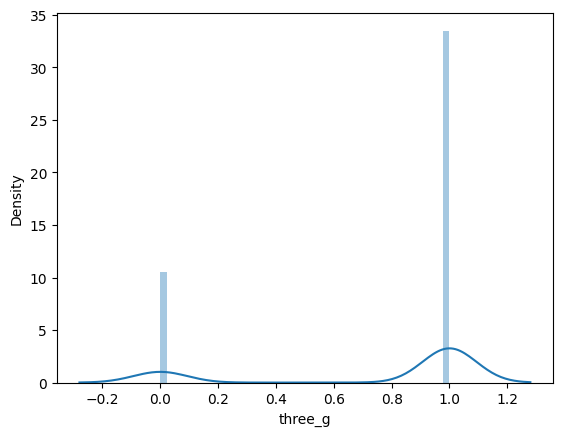


column touch_screen


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


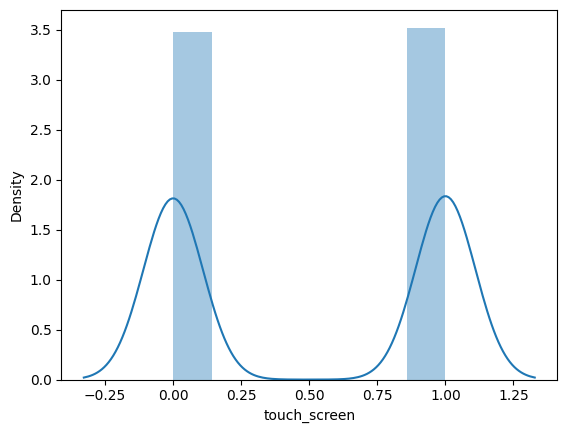


column wifi


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


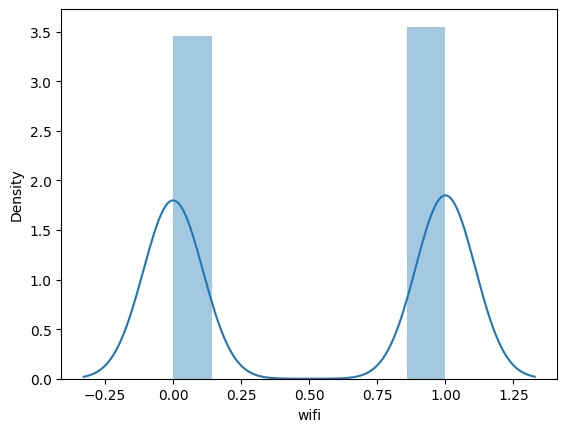


column price_range


<ipython-input-13-4d0b96fc5d56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[j])


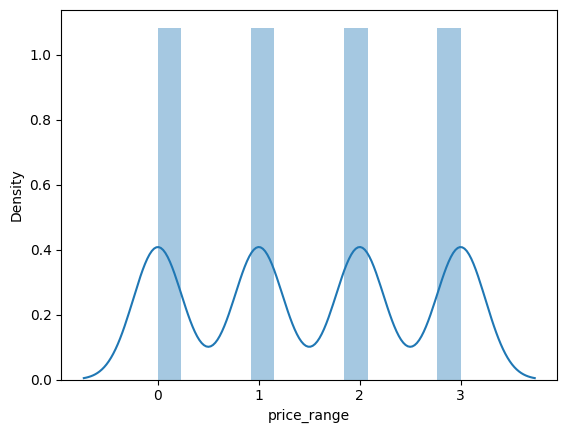

In [13]:
for j in Num_var:
 print('column',j)
 sb.distplot(df[j])
 plt.show()
 print('')

# Heatmap Correaltion Matrix
To check Realation with Target Variable

In [14]:
corr=df.corr()

<Axes: >

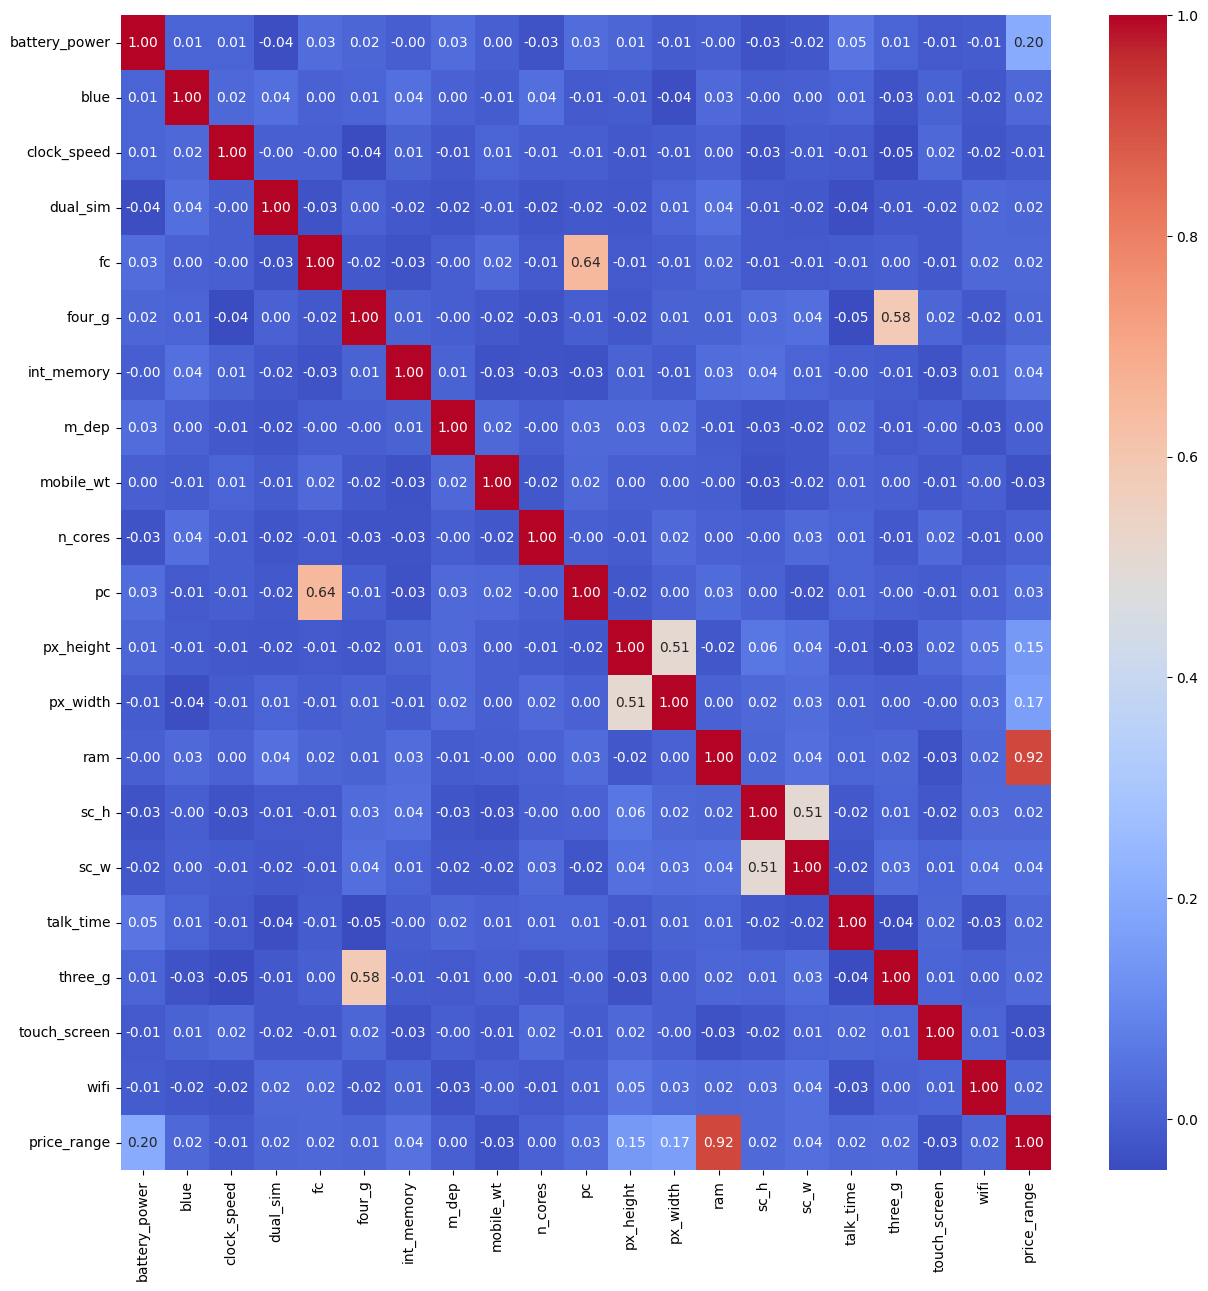

In [15]:
plt.figure(figsize=(15,15))
sb.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')

# Removing Outliers by IQR method

In [16]:
Q1=df['fc'].quantile(0.25)
Q3=df['fc'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df=df[(df['fc']<UL) & (df['fc']>LL)]

In [17]:
Q1=df['px_height'].quantile(0.25)
Q3=df['px_height'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df=df[(df['px_height']<UL) & (df['px_height']>LL)]

In [18]:
def convert(x):
    if x <1:
        return(0)
    elif x==1:
        return(1)
    else:
        return(2)

df['price_range']=df['price_range'].apply(convert)

In [19]:
df['price_range'].value_counts()

2    979
0    491
1    486
Name: price_range, dtype: int64

# Data Split

In [20]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [21]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [22]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    2
1998    0
1999    2
Name: price_range, Length: 1956, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [24]:
x_train.shape,x_test.shape

((1564, 20), (392, 20))

# Balancing the data

In [25]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=42)
x_train,y_train=smt.fit_resample(x_train,y_train)

In [26]:
y_train.value_counts()

0    766
2    764
1    761
Name: price_range, dtype: int64

# Standard Scaling
To normalize the data and bring features to the same scale

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss=StandardScaler()

In [29]:
x_train_scl=ss.fit_transform(x_train)
x_test_scl=ss.transform(x_test)

In [30]:
x_train=pd.DataFrame(x_train_scl,columns=x_train.columns)
x_test=pd.DataFrame(x_test_scl,columns=x_test.columns)

In [31]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1.560462,1.182773,-1.343235,-0.860745,1.344856,-0.883238,-0.173497,0.359474,-1.617408,1.641025,1.645707,-0.984115,-0.484193,-0.487182,1.449520,0.361517,-1.730368,-1.520097,-0.893461,-0.837902
1,0.837432,-0.845470,-0.174834,-0.860745,0.289606,1.132198,-0.348856,-1.480335,-0.315183,0.726172,1.121007,-1.204533,-0.272374,1.815387,0.199200,-0.610306,0.410904,0.657853,1.119243,-0.837902
2,0.487430,-0.845470,-1.213413,-0.860745,1.344856,-0.883238,1.463191,-1.112373,-1.587812,-0.646107,0.071609,-1.477093,-1.355271,0.009094,0.699328,1.090385,1.384209,-1.520097,-0.893461,1.193457
3,0.261771,1.182773,1.642680,1.161785,2.400105,1.132198,-1.576372,1.831322,-1.558216,-0.188681,1.470807,-1.287486,-1.707510,1.498879,1.199456,2.548119,1.384209,0.657853,-0.893461,-0.837902
4,-1.050736,-0.845470,0.214634,1.161785,-1.029456,1.132198,0.060316,-0.008487,-1.025487,-0.188681,-1.327589,1.485516,1.745861,0.819009,-0.801056,-0.610306,1.578870,0.657853,-0.893461,-0.837902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,-0.606326,1.182773,-1.200212,-0.860745,-1.029456,1.132198,0.411034,-0.308886,-0.788719,-1.560960,0.771208,0.106125,1.307942,-0.571329,0.199200,-0.853261,-0.562401,0.657853,-0.893461,-0.837902
2287,-0.053691,-0.845470,1.006041,-0.860745,1.872481,1.132198,1.638550,0.394828,-0.729527,-1.103534,0.946108,-0.576460,-0.953052,0.165913,-1.551249,-1.339173,1.189548,0.657853,1.119243,-0.837902
2288,1.542041,-0.845470,0.798453,-0.860745,-1.029456,1.132198,-1.225653,-1.382742,1.312599,0.268746,-0.977790,0.227000,0.524924,-0.791259,-1.551249,-1.096217,-1.535707,0.657853,-0.893461,-0.837902
2289,1.180525,-0.845470,0.766261,-0.860745,1.344856,1.132198,-1.459466,0.650833,1.253407,0.726172,1.121007,-1.223494,1.688741,-0.368612,0.699328,-0.124394,-1.730368,0.657853,-0.893461,-0.837902


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg=LogisticRegression()

In [34]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [35]:
test=logreg.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix


In [37]:
Accuracy=accuracy_score(test,y_test)*100
print('Accuracy',Accuracy)

Accuracy 96.1734693877551


In [38]:
def CM(Act,Pred):
  cm = confusion_matrix(Act,Pred)
  sb.heatmap(cm,annot = True,fmt = '.2f',xticklabels=['0','1','2']
             ,yticklabels=['0','1','2'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Confusion Matrix")
  plt.show()

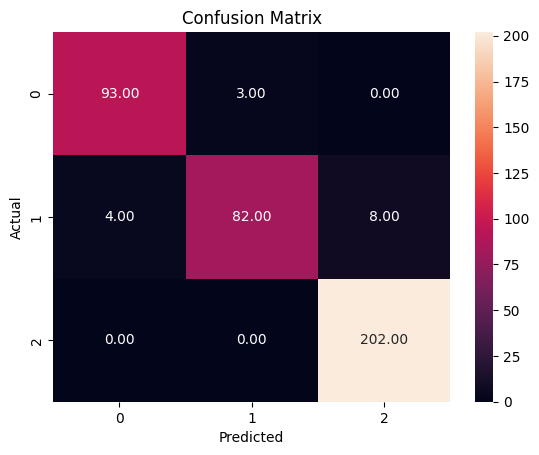

In [39]:
CM(test,y_test)

In [40]:
cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']
result_tabulation = pd.DataFrame(columns = cols)

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dt.predict(x_test)

In [45]:
Accuracy=accuracy_score(y_pred,y_test)*100
print('Accuracy',Accuracy)

Accuracy 91.58163265306123


In [46]:
clf_report=classification_report(test,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        96
           1       0.96      0.87      0.92        94
           2       0.96      1.00      0.98       202

    accuracy                           0.96       392
   macro avg       0.96      0.95      0.95       392
weighted avg       0.96      0.96      0.96       392



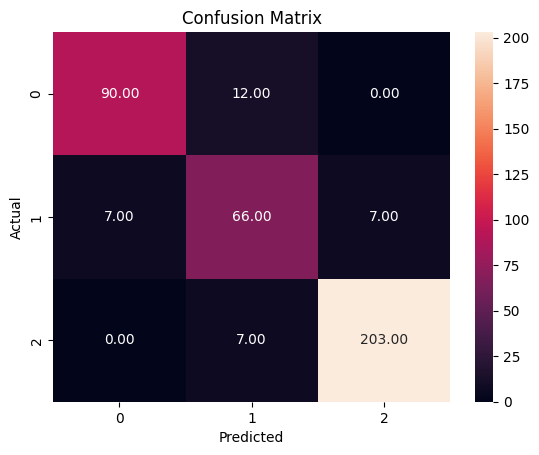

In [47]:
CM(y_pred,y_test)

# Support Vector Machine

In [48]:
from sklearn import svm

In [49]:
clf=svm.SVC()

In [50]:
clf.fit(x_train,y_train)

SVC()

In [51]:
test_svm=clf.predict(x_test)

In [52]:
Accuracy=accuracy_score(test_svm,y_test)*100
print('Accuracy',Accuracy)

Accuracy 91.58163265306123


In [53]:
clf_report=classification_report(test_svm,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       100
           1       0.88      0.77      0.82        98
           2       0.91      0.99      0.95       194

    accuracy                           0.92       392
   macro avg       0.92      0.89      0.90       392
weighted avg       0.92      0.92      0.91       392



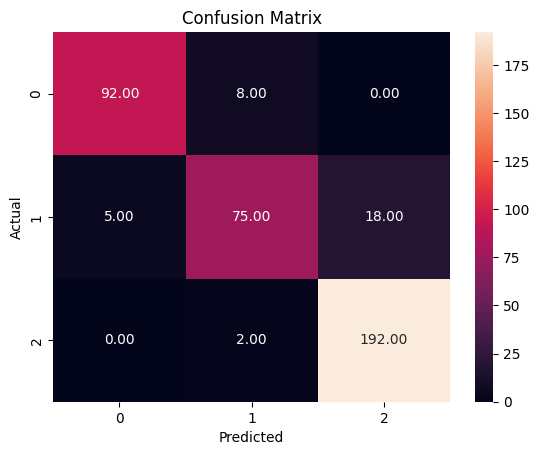

In [54]:
CM(test_svm,y_test)

# K-Neighrest Neighbour

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier()

In [57]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
test_knn=knn.predict(x_test)

In [59]:
Accuracy=accuracy_score(test_knn,y_test)*100
print('Accuracy',Accuracy)

Accuracy 58.92857142857143


In [60]:
clf_report=classification_report(test_knn,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.72      0.57      0.64       122
           1       0.45      0.28      0.35       135
           2       0.59      0.91      0.71       135

    accuracy                           0.59       392
   macro avg       0.58      0.59      0.57       392
weighted avg       0.58      0.59      0.56       392



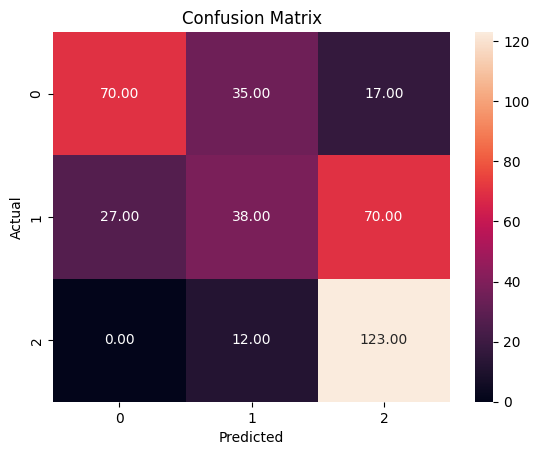

In [61]:
CM(test_knn,y_test)

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc=RandomForestClassifier()

In [64]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
test_rfc=rfc.predict(x_test)

In [66]:
Accuracy=accuracy_score(test_rfc,y_test)*100
print('Accuracy',Accuracy)

Accuracy 92.60204081632652


In [67]:
clf_report=classification_report(test_rfc,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       104
           1       0.81      0.84      0.83        82
           2       0.96      0.98      0.97       206

    accuracy                           0.93       392
   macro avg       0.91      0.90      0.90       392
weighted avg       0.93      0.93      0.93       392



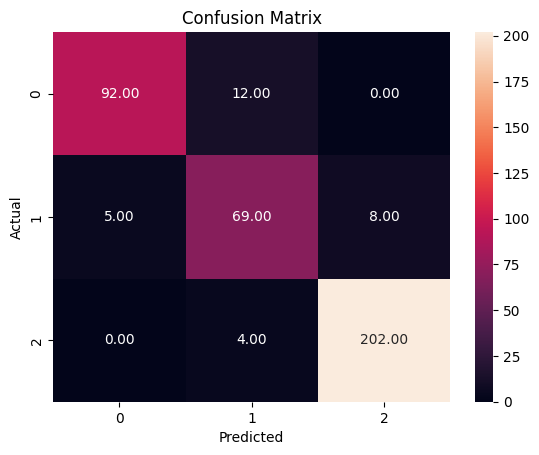

In [68]:
CM(test_rfc,y_test)

# Neural Network

In [69]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(hidden_layer_sizes = (10,5,10), max_iter=100)
NN.fit(x_train_scl,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5, 10), max_iter=100)

In [70]:
test_nn=NN.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [71]:
Accuracy=accuracy_score(test_nn,y_test)*100
print('Accuracy',Accuracy)

Accuracy 95.91836734693877


In [72]:
clf_report=classification_report(test_nn,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        96
           1       0.93      0.89      0.91        89
           2       0.97      0.99      0.98       207

    accuracy                           0.96       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.96      0.96      0.96       392



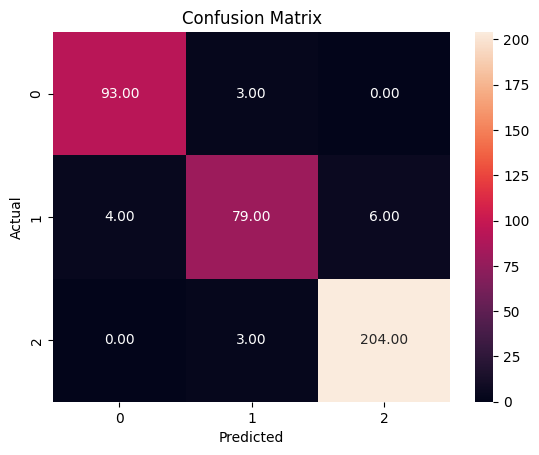

In [73]:
CM(test_nn,y_test)

# HyperParameter Tuning for KNN with Grid Search CV

In [74]:
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')


In [75]:
param_grid = {
    'n_neighbors': [3, 5, 7], # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]  # Power parameter for distance calculation (1 = Manhattan, 2 = Euclidean)
}

In [76]:
grid_search= GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [78]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.7966197638686721


# HyperParameter Tuning for KNN with Randomized Search CV

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
param_dist = {
    'n_neighbors':(1, 20),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]  # Power parameter for distance calculation (1 = Manhattan, 2 = Euclidean)
}

In [81]:
random_search = RandomizedSearchCV(knn,param_dist, n_iter=10, cv=5, scoring='accuracy')

In [82]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': (1, 20), 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [83]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 20}
Best Accuracy: 0.8162713702657192


# Implementing Best parameters in KNN algorithm

In [84]:
knn = KNeighborsClassifier(p=1, n_neighbors= 20)

In [85]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20, p=1)

In [86]:
test1_knn=knn.predict(x_test)

In [87]:
Accuracy=accuracy_score(test1_knn,y_test)*100
print('Accuracy',Accuracy)

Accuracy 68.62244897959184


In [88]:
clf_report=classification_report(test1_knn,y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       119
           1       0.58      0.39      0.46       127
           2       0.66      0.95      0.78       146

    accuracy                           0.69       392
   macro avg       0.69      0.67      0.67       392
weighted avg       0.69      0.69      0.67       392



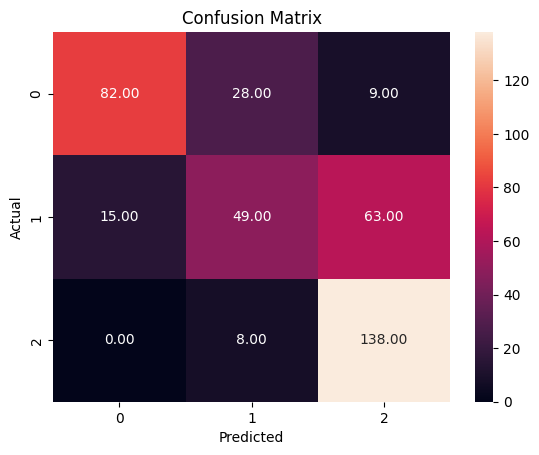

In [89]:
CM(test1_knn,y_test)

# Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gbc=GradientBoostingClassifier()

In [92]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [93]:
test_gbc=gbc.predict(x_test)

In [94]:
Accuracy=accuracy_score(test_gbc,y_test)*100
print('Accuracy',Accuracy)

Accuracy 93.62244897959184


# Ada Boost

In [95]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [96]:
ada_test=abc.predict(x_test)

In [97]:
Accuracy=accuracy_score(ada_test,y_test)*100
print('Accuracy',Accuracy)

Accuracy 68.62244897959184


# XG Boosting

In [98]:
from xgboost import XGBClassifier

In [99]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

In [100]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [101]:
test_xgb=xgb_classifier.predict(x_test)

In [102]:
Accuracy=accuracy_score(test_xgb,y_test)*100
print('Accuracy Score',Accuracy)

Accuracy Score 92.85714285714286


# Pycaret- Auto ML

In [103]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 113.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 135.7 MB/s eta 0:

In [104]:
from pycaret.classification import setup
cls = setup(df,target = 'price_range')

,Description,Value
0,Session id,3322
1,Target,price_range
2,Target type,Multiclass
3,Original data shape,"(1956, 21)"
4,Transformed data shape,"(1956, 21)"
5,Transformed train set shape,"(1369, 21)"
6,Transformed test set shape,"(587, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [105]:
from pycaret.classification import compare_models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9511,0.9928,0.9511,0.9522,0.9513,0.9219,0.9222,0.0890
lightgbm,Light Gradient Boosting Machine,0.9401,0.9925,0.9401,0.9414,0.9403,0.9043,0.9048,1.2810
xgboost,Extreme Gradient Boosting,0.9394,0.9925,0.9394,0.9404,0.9395,0.9032,0.9036,0.5260
lda,Linear Discriminant Analysis,0.9386,0.9919,0.9386,0.9459,0.9400,0.9034,0.9059,0.0530
qda,Quadratic Discriminant Analysis,0.9343,0.9928,0.9343,0.9349,0.9334,0.8944,0.8954,0.1560
gbc,Gradient Boosting Classifier,0.9335,0.9898,0.9335,0.9350,0.9337,0.8939,0.8944,1.3210
rf,Random Forest Classifier,0.9050,0.9832,0.9050,0.9054,0.9043,0.8476,0.8484,0.8190
dt,Decision Tree Classifier,0.8941,0.9202,0.8941,0.8951,0.8938,0.8303,0.8310,0.1760
et,Extra Trees Classifier,0.8875,0.9795,0.8875,0.8865,0.8815,0.8164,0.8211,0.3830
nb,Naive Bayes,0.8817,0.9727,0.8817,0.8865,0.8828,0.8114,0.8126,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]